### Example notebook - differential gene expression for different cancer types

This notebook demonstrates the analysis of differential gene expression.
- title: "DGE - Cancer Types"
- author: "Margaret Paiva"
- output: R notebook

In [2]:
suppressPackageStartupMessages(library(jsonlite))
suppressPackageStartupMessages(library(rjson))
suppressPackageStartupMessages(library(httr))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(data.table))
suppressPackageStartupMessages(library(parallel))
suppressPackageStartupMessages(library(DBI))
suppressPackageStartupMessages(library(DT))
suppressPackageStartupMessages(library(limma))
suppressPackageStartupMessages(library(fgsea))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))

In [3]:
# In "gene_list.csv", define a list of genes of interest
gene_list  <- as.list(read.csv("gene_list.csv")$x)

In [4]:
# Enter the file name of the .json file in your root directory below
lt  <-  fromJSON(file = "./data/requested_data---19-10-2021---20_44_20.json")

In [ ]:
# Create a dataframe from the data
df  <- do.call(rbind, lapply(lt, rbind))
df  <- as.data.frame(df)
df$tumor_type  <- as.character(df$tumor_type)  # each column is a list - specify data type
df$z  <- as.numeric(df$z)
head(df, 2)
print(dim(df))

In [ ]:
# Define a gene of interest
gene_choice <- 'ACSM3'
df_gene  <- df %>% 
    na.omit()  %>% 
    filter(gene==gene_choice)  # put your gene of interest here
head(df_gene, 2)

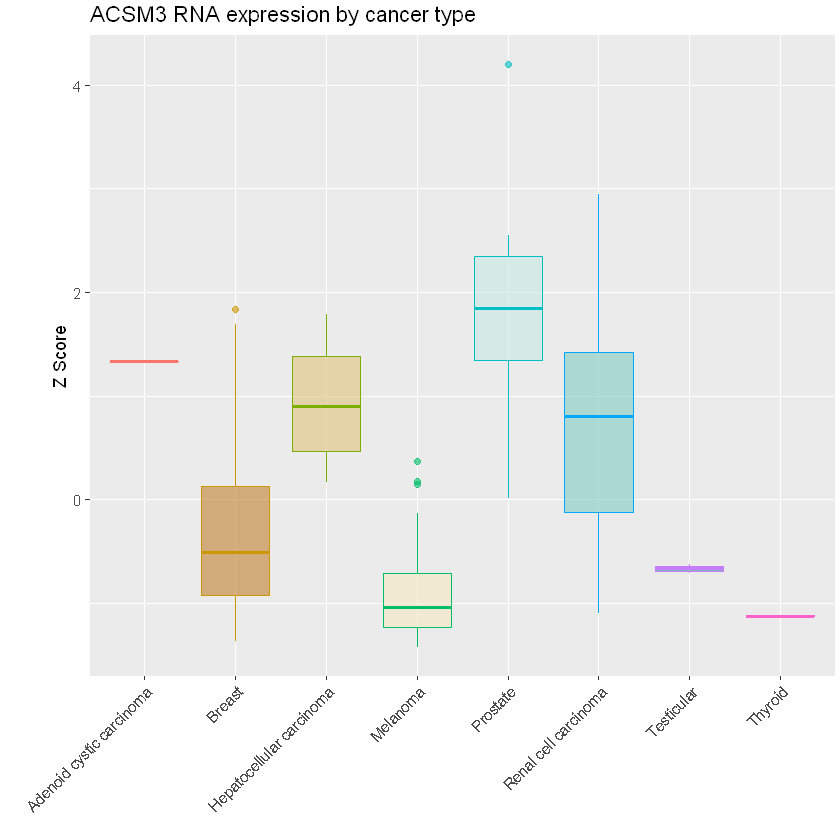

In [9]:
# Visualize the expression levels by cancer type
ggplot(df_gene, aes(x=tumor_type, y=z, fill=tumor_type, color=tumor_type)) +
    geom_boxplot(alpha=0.6) +
    theme(axis.text.x = element_text(angle = 45, hjust = 1),
          legend.position = "none", 
          plot.margin = unit(c(0,0,0,1)+0.1, "cm")) +
    labs(x="", y="Z Score", 
         title=paste0(gene_choice, " RNA expression by cancer type")) +
    scale_fill_brewer(palette="BrBG")